# Data Cleaning Challenge

## In this notebook, I will a clean and explore a dataset from Kaggle relating to cafe sales.

### Step 1: Load the dataset into a dataframe.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent theme
sns.set_theme(style="whitegrid")

# Customize fonts, grid, and color palette
plt.rcParams.update({
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titleweight": "bold",
    "axes.labelweight": "semibold",
    "figure.facecolor": "white",
    "axes.edgecolor": "#333333"
})

In [2]:
df = pd.read_csv(r'/Users/sebastianmukuria/Desktop/Pandas Practice/dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


Just from showing the head, I can already see some issues. ERROR in total spent, UNKNOWN in Payment Method and Location. I can calculate total spent from quantity and price per unit. Before I do that, I will explore the data a bit further.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


This tells me, I have 10,000 transaction IDs and likely many nulls in all of the other columns. Since each line is related to the sale of one item, I'm curious if each transaction ID is unique or linked to the sale of multiple items.

In [4]:
df["Transaction ID"].nunique()

10000

This tells me that each transaction ID is unique, so each transaction is likely related to the sale of one item.

In [5]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [6]:
df.shape

(10000, 8)

In [7]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

Going to change the types to ones that I want / can work with properly.

In [8]:
df = df.convert_dtypes()

In [9]:
df.dtypes

Transaction ID      string[python]
Item                string[python]
Quantity            string[python]
Price Per Unit      string[python]
Total Spent         string[python]
Payment Method      string[python]
Location            string[python]
Transaction Date    string[python]
dtype: object

In [10]:
df['Transaction ID'] = pd.to_numeric(df['Transaction ID'].str[4:], errors='coerce').astype('Int64')
print(df['Transaction ID'])

0       1961373
1       4977031
2       4271903
3       7034554
4       3160411
         ...   
9995    7672686
9996    9659401
9997    5255387
9998    7695629
9999    6170729
Name: Transaction ID, Length: 10000, dtype: Int64


In [11]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('Int64')
print(df['Quantity'])

0       2
1       4
2       4
3       2
4       2
       ..
9995    2
9996    3
9997    4
9998    3
9999    3
Name: Quantity, Length: 10000, dtype: Int64


In [12]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce').astype('float')

In [13]:
print(df['Price Per Unit'])

0       2.0
1       3.0
2       1.0
3       5.0
4       2.0
       ... 
9995    2.0
9996    NaN
9997    2.0
9998    NaN
9999    4.0
Name: Price Per Unit, Length: 10000, dtype: float64


In [14]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce').astype('float')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [15]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


So far, I've converted the data types of each column to one that I can work with, replacing things like error / unknown in the numeric columns with NaN.

I should be able to calculate the values for missing, Items, Quantity, Price Per Unit, and Total Spent based on the other information available in the table.

In [16]:
df.groupby('Item')['Price Per Unit'].unique().to_dict()

{'Cake': array([ 3., nan]),
 'Coffee': array([ 2., nan]),
 'Cookie': array([ 1., nan]),
 'ERROR': array([1.5, 3. , 5. , nan, 4. , 2. , 1. ]),
 'Juice': array([ 3., nan]),
 'Salad': array([ 5., nan]),
 'Sandwich': array([ 4., nan]),
 'Smoothie': array([ 4., nan]),
 'Tea': array([1.5, nan]),
 'UNKNOWN': array([3. , 1. , 5. , 4. , 1.5, 2. , nan])}

This tells me that they all have unique prices except Cake/Juice and Smoothie/Sandwich. So I can replace all NaNs with the appropriate value except if the Price = 4 because it could be either. 

In [17]:
price_counts = df.groupby('Item')['Price Per Unit'].nunique()
price_counts

Item
Cake        1
Coffee      1
Cookie      1
ERROR       6
Juice       1
Salad       1
Sandwich    1
Smoothie    1
Tea         1
UNKNOWN     6
Name: Price Per Unit, dtype: int64

In [18]:
clean_lookup = (
    df.groupby('Item')['Price Per Unit']
      .apply(lambda x: x.dropna().unique()[0] if x.nunique() == 1 else None)
      .to_dict()
)
df['Filled Price'] = df['Item'].map(clean_lookup)

In [19]:
# (A) Fill Price Per Unit from the lookup column you just made
df['Price Per Unit'] = df['Price Per Unit'].combine_first(df['Filled Price'])

# (B) Fill remaining missing prices using Total Spent / Quantity
mask_missing_price = (
    df['Price Per Unit'].isna() &
    df['Quantity'].notna() &
    df['Total Spent'].notna()
)
df.loc[mask_missing_price, 'Price Per Unit'] = (
    df.loc[mask_missing_price, 'Total Spent'] / df.loc[mask_missing_price, 'Quantity']
)

# Optional: drop the helper column now that it's used
# df.drop(columns=['Filled Price'], inplace=True)

In [20]:
# Exclude ERROR/UNKNOWN/NA when deciding which prices are unique to a single item
clean_items_df = df[~df['Item'].isin(['ERROR', 'UNKNOWN']) & df['Item'].notna()]

price_to_item = (
    clean_items_df.groupby('Item')['Price Per Unit']
      .unique()
      .explode()
      .reset_index()
)

price_counts = price_to_item.groupby('Price Per Unit')['Item'].nunique()
unique_prices = price_counts[price_counts == 1].index

unique_price_map = (
    price_to_item[price_to_item['Price Per Unit'].isin(unique_prices)]
    .set_index('Price Per Unit')['Item']
    .to_dict()
)

print("Unique price → item map:", unique_price_map)

Unique price → item map: {2.0: 'Coffee', 1.0: 'Cookie', 5.0: 'Salad', 1.5: 'Tea'}


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  Int64         
 1   Item              9667 non-null   string        
 2   Quantity          9521 non-null   Int64         
 3   Price Per Unit    9994 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   string        
 6   Location          6735 non-null   string        
 7   Transaction Date  9540 non-null   datetime64[ns]
 8   Filled Price      9031 non-null   float64       
dtypes: Int64(2), datetime64[ns](1), float64(3), string(3)
memory usage: 722.8 KB


In [22]:
mask_dirty_items = df['Item'].isin(['ERROR', 'UNKNOWN']) | df['Item'].isna()

df.loc[mask_dirty_items, 'Item'] = (
    df.loc[mask_dirty_items, 'Price Per Unit']
      .map(unique_price_map)                 # fill if the price uniquely identifies the item
      .fillna(df.loc[mask_dirty_items, 'Item'])  # otherwise keep as-is
)

In [23]:
ambiguous_prices = price_counts[price_counts > 1].index  # e.g., 4.0 for Sandwich & Smoothie; possibly 3.0 if Cake & Juice share it

df['Ambiguous Flag'] = (
    (df['Item'].isin(['ERROR', 'UNKNOWN']) | df['Item'].isna()) &
    df['Price Per Unit'].isin(ambiguous_prices)
)

# Optional quick look:
# df.loc[df['Ambiguous Flag'], ['Transaction ID','Item','Price Per Unit','Quantity','Total Spent']].head(10)


In [24]:
mask_missing_total = (
    df['Total Spent'].isna() &
    df['Quantity'].notna() &
    df['Price Per Unit'].notna()
)

df.loc[mask_missing_total, 'Total Spent'] = (
    df.loc[mask_missing_total, 'Quantity'] * df.loc[mask_missing_total, 'Price Per Unit']
)

In [25]:
mask_missing_qty = (
    df['Quantity'].isna() &
    df['Price Per Unit'].notna() &
    df['Total Spent'].notna()
)

df.loc[mask_missing_qty, 'Quantity'] = (
    (df.loc[mask_missing_qty, 'Total Spent'] / df.loc[mask_missing_qty, 'Price Per Unit'])
    .round()
    .astype('Int64')   # keep nullable integer dtype
)

In [26]:
# Identify rows where Quantity is missing but Price and Total Spent are known
mask_missing_qty = df['Quantity'].isna() & df['Price Per Unit'].notna() & df['Total Spent'].notna()

# Fill Quantity = Total Spent / Price Per Unit
df.loc[mask_missing_qty, 'Quantity'] = (
    df.loc[mask_missing_qty, 'Total Spent'] / df.loc[mask_missing_qty, 'Price Per Unit']
).round().astype('Int64')  # round in case of float division, keep nullable int

# Optional: flag inconsistencies where Quantity * Price != Total
df['QtyMismatch'] = (
    df['Quantity'].notna() & df['Price Per Unit'].notna() & df['Total Spent'].notna() &
    (df['Total Spent'].round(2) != (df['Quantity'] * df['Price Per Unit']).round(2))
)

print(f"Filled {mask_missing_qty.sum()} missing Quantity values")
print(f"Flagged {df['QtyMismatch'].sum()} mismatched quantities")


Filled 0 missing Quantity values
Flagged 0 mismatched quantities


In [27]:
# Consistency flags
df['TotalMismatch'] = (
    df['Quantity'].notna() & df['Price Per Unit'].notna() & df['Total Spent'].notna() &
    (df['Total Spent'].round(2) != (df['Quantity'] * df['Price Per Unit']).round(2))
)

summary = {
    "Rows": len(df),
    "Missing prices": int(df['Price Per Unit'].isna().sum()),
    "Missing totals": int(df['Total Spent'].isna().sum()),
    "Missing quantities": int(df['Quantity'].isna().sum()),
    "Ambiguous rows (shared price & dirty item)": int(df['Ambiguous Flag'].sum()),
    "Total mismatches (Q×P ≠ Total)": int(df['TotalMismatch'].sum()),
    "Ambiguous prices list": sorted(map(float, ambiguous_prices)) if len(ambiguous_prices) else [],
    "Unique price→item keys": sorted(map(float, unique_price_map.keys())) if unique_price_map else [],
}

print("Cleaning Summary:")
for k, v in summary.items():
    print(f"- {k}: {v}")

Cleaning Summary:
- Rows: 10000
- Missing prices: 6
- Missing totals: 23
- Missing quantities: 23
- Ambiguous rows (shared price & dirty item): 474
- Total mismatches (Q×P ≠ Total): 0
- Ambiguous prices list: [3.0, 4.0]
- Unique price→item keys: [1.0, 1.5, 2.0, 5.0]


In [28]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Filled Price,Ambiguous Flag,QtyMismatch,TotalMismatch
0,1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,2.0,False,False,False
1,4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,3.0,False,False,False
2,4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,1.0,False,False,False
3,7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,5.0,False,False,False
4,3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,2.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,2,2.0,4.0,<NA>,UNKNOWN,2023-08-30,2.0,False,False,False
9996,9659401,Cookie,3,1.0,3.0,Digital Wallet,<NA>,2023-06-02,NaN,False,False,False
9997,5255387,Coffee,4,2.0,8.0,Digital Wallet,<NA>,2023-03-02,2.0,False,False,False
9998,7695629,Cookie,3,1.0,3.0,Digital Wallet,<NA>,2023-12-02,1.0,False,False,False


In [29]:
df.head(50)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Filled Price,Ambiguous Flag,QtyMismatch,TotalMismatch
0,1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,2.0,False,False,False
1,4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,3.0,False,False,False
2,4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19,1.0,False,False,False
3,7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,5.0,False,False,False
4,3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,2.0,False,False,False
5,2602893,Smoothie,5,4.0,20.0,Credit Card,<NA>,2023-03-31,4.0,False,False,False
6,4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06,NaN,True,False,False
7,6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28,4.0,False,False,False
8,4717867,<NA>,5,3.0,15.0,<NA>,Takeaway,2023-07-28,NaN,True,False,False
9,2064365,Sandwich,5,4.0,20.0,<NA>,In-store,2023-12-31,4.0,False,False,False


In [30]:
# Replace "ERROR" and "UNKNOWN" with pandas NA
df['Item'] = df['Item'].replace(['ERROR', 'UNKNOWN'], pd.NA)

# Exploratory Data Analysis

In [31]:
# Top Selling Items
df.groupby('Item')['Quantity'].sum().sort_values(ascending=False)

Item
Coffee      3904
Salad       3819
Tea         3650
Cookie      3598
Juice       3505
Cake        3468
Sandwich    3429
Smoothie    3336
Name: Quantity, dtype: Int64

In [32]:
# Revenue by Item
df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

Item
Salad       19095.0
Sandwich    13716.0
Smoothie    13344.0
Juice       10515.0
Cake        10404.0
Coffee       7808.0
Tea          5475.0
Cookie       3598.0
Name: Total Spent, dtype: float64

<Axes: xlabel='Transaction Date'>

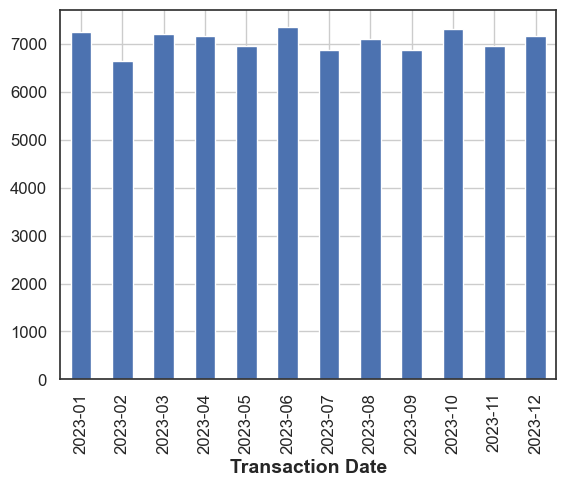

In [33]:
# Revenue trends over time
df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum().plot(kind='bar')

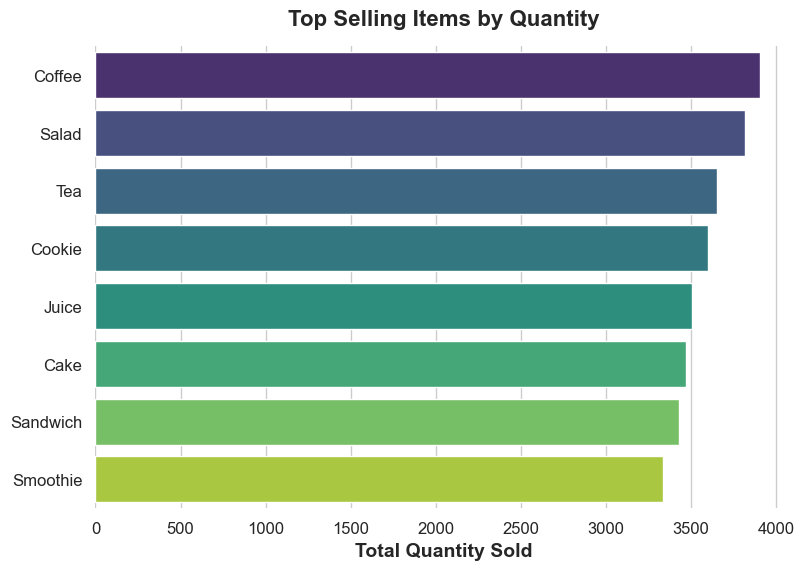

In [34]:
# Top selling items by quantity
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(
    data=df.groupby("Item", as_index=False)["Quantity"].sum().sort_values("Quantity", ascending=False),
    x="Quantity", y="Item", palette="viridis", ax=ax
)
ax.set_title("Top Selling Items by Quantity", pad=15)
ax.set_xlabel("Total Quantity Sold")
ax.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()


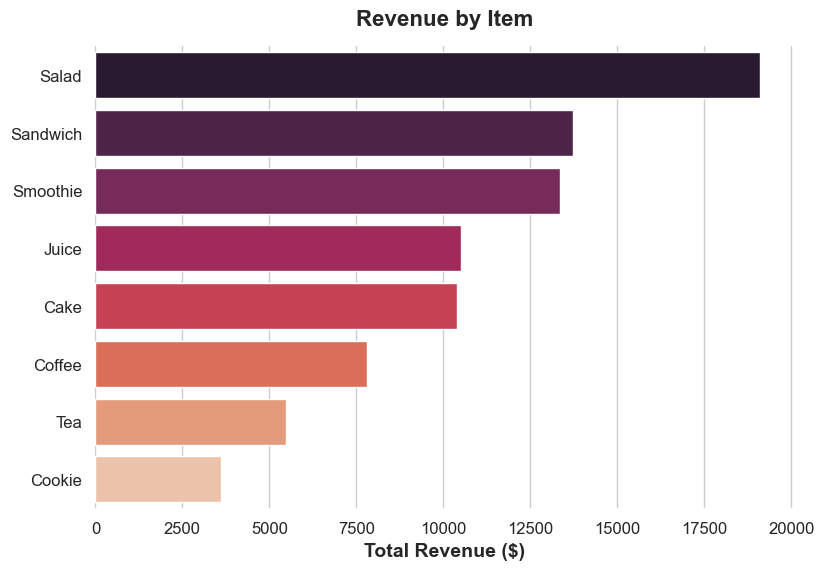

In [35]:
# Top revenue items
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(
    data=df.groupby("Item", as_index=False)["Total Spent"].sum().sort_values("Total Spent", ascending=False),
    x="Total Spent", y="Item", palette="rocket", ax=ax
)
ax.set_title("Revenue by Item", pad=15)
ax.set_xlabel("Total Revenue ($)")
ax.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()



In [36]:
# Average spend per transaction
df.groupby('Transaction ID')['Total Spent'].sum().mean()

8.9096

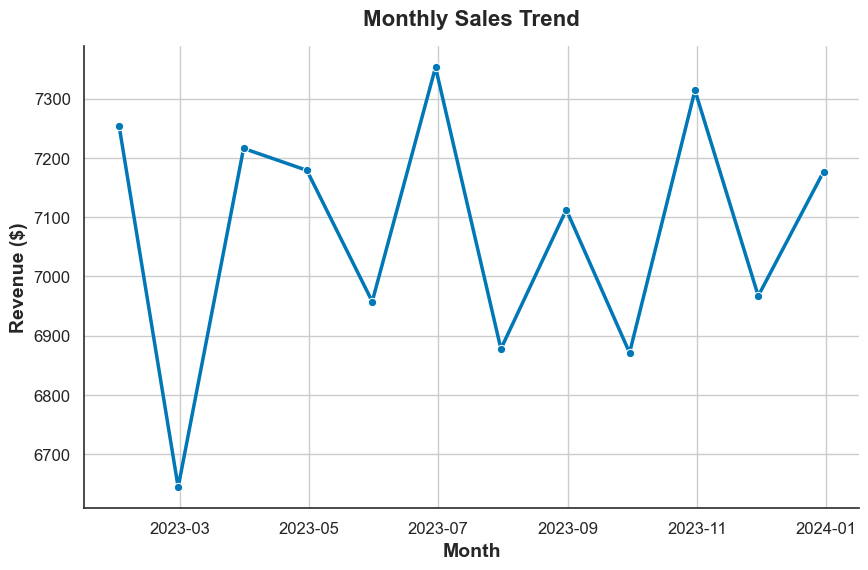

In [37]:
# Sales Trends over Time
monthly = df.set_index("Transaction Date").resample("M")["Total Spent"].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=monthly, x="Transaction Date", y="Total Spent", marker="o", linewidth=2.5, color="#0077b6", ax=ax)
ax.set_title("Monthly Sales Trend", pad=15)
ax.set_xlabel("Month")
ax.set_ylabel("Revenue ($)")
sns.despine()
plt.show()


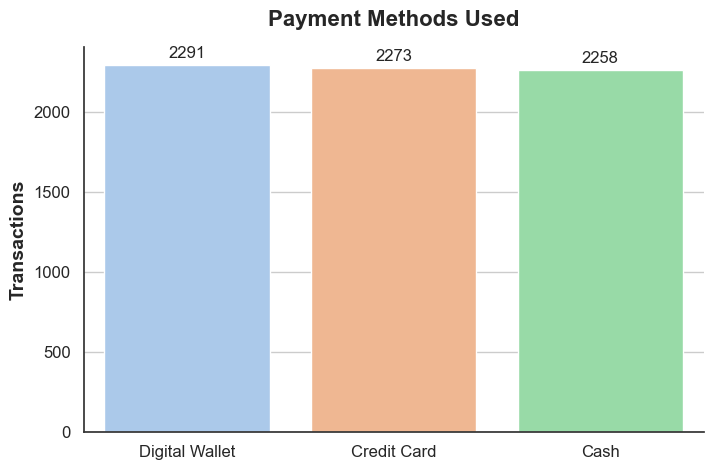

In [38]:
# Payment Method Distribution
# Keep only the three main payment methods
valid_methods = ["Digital Wallet", "Credit Card", "Cash"]
plot_df = df[df["Payment Method"].isin(valid_methods)]

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(
    data=plot_df,
    x="Payment Method",
    palette="pastel",
    order=plot_df["Payment Method"].value_counts().index,
    ax=ax
)
ax.set_title("Payment Methods Used", pad=15)
ax.set_xlabel("")
ax.set_ylabel("Transactions")

# Add count labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

sns.despine()
plt.show()



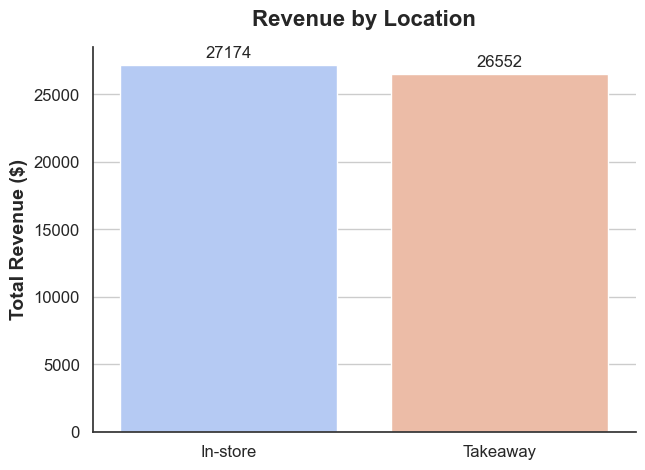

In [39]:
# Revenue by location
# Keep only the two main locations
valid_locations = ["In-store", "Takeaway"]
plot_df = df[df["Location"].isin(valid_locations)]

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(
    data=plot_df.groupby("Location", as_index=False)["Total Spent"].sum(),
    x="Location", y="Total Spent",
    palette="coolwarm", ax=ax
)
ax.set_title("Revenue by Location", pad=15)
ax.set_ylabel("Total Revenue ($)")
ax.set_xlabel("")

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

sns.despine()
plt.show()


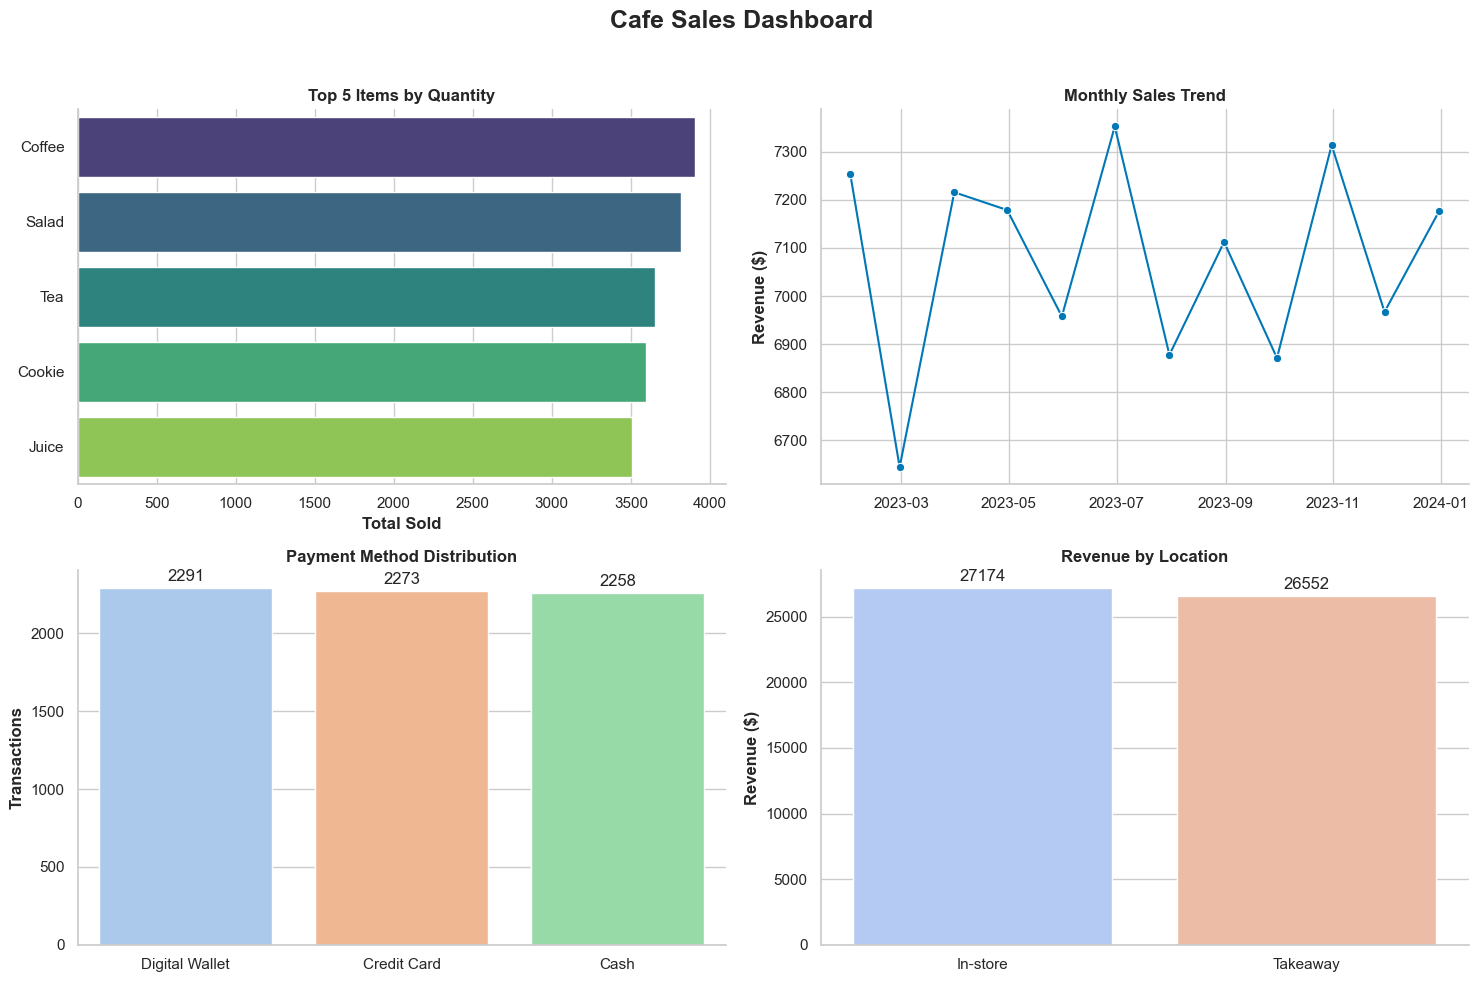

In [44]:
# Make sure theme is set
sns.set_theme(style="whitegrid")

# --- Prepare summary data ---
# Top 5 items by quantity
top_items = df.groupby("Item", as_index=False)["Quantity"].sum().sort_values("Quantity", ascending=False).head(5)

# Monthly sales
monthly = df.set_index("Transaction Date").resample("M")["Total Spent"].sum().reset_index()

# Payment method (filter)
valid_methods = ["Digital Wallet", "Credit Card", "Cash"]
pay_df = df[df["Payment Method"].isin(valid_methods)]
pay_counts = pay_df["Payment Method"].value_counts()

# Location revenue (filter)
valid_locations = ["In-store", "Takeaway"]
loc_df = df[df["Location"].isin(valid_locations)]
loc_revenue = loc_df.groupby("Location", as_index=False)["Total Spent"].sum()

# --- Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Cafe Sales Dashboard", fontsize=18, weight="bold")

# Plot 1: Top items
sns.barplot(data=top_items, x="Quantity", y="Item", palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Top 5 Items by Quantity")
axes[0,0].set_xlabel("Total Sold")
axes[0,0].set_ylabel("")
sns.despine(ax=axes[0,0])

# Plot 2: Monthly sales
sns.lineplot(data=monthly, x="Transaction Date", y="Total Spent", marker="o", color="#0077b6", ax=axes[0,1])
axes[0,1].set_title("Monthly Sales Trend")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("Revenue ($)")
sns.despine(ax=axes[0,1])

# Plot 3: Payment methods
sns.barplot(x=pay_counts.index, y=pay_counts.values, palette="pastel", ax=axes[1,0])
axes[1,0].set_title("Payment Method Distribution")
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Transactions")
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='%d', padding=3)
sns.despine(ax=axes[1,0])

# Plot 4: Location revenue
sns.barplot(data=loc_revenue, x="Location", y="Total Spent", palette="coolwarm", ax=axes[1,1])
axes[1,1].set_title("Revenue by Location")
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Revenue ($)")
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, fmt='%.0f', padding=3)
sns.despine(ax=axes[1,1])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the main title
plt.show()

# Save to file (PNG, high resolution)
fig.savefig("cafe_sales_dashboard.png", dpi=300, bbox_inches="tight")


In [46]:
import os
os.makedirs("data", exist_ok=True)
# Save the cleaned dataset
df.to_csv("data/cleaned_cafe_sales.csv", index=False)